In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd

In [2]:
df=pd.read_csv("HR_comma_sep.csv.crdownload")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
cols=df.columns.tolist()

In [5]:
def reading_cleaning(df):
    cols=df.columns.tolist()
    df.columns=[x.lower() for x in cols]
    df.drop_duplicates(inplace=True)

    return df

df=reading_cleaning(df)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
df['satisfaction_level'].mean()

0.6025083272990586

In [7]:
df.groupby('department')['satisfaction_level'].mean()

department
IT             0.596568
RandD          0.606976
accounting     0.578370
hr             0.595282
management     0.599833
marketing      0.605653
product_mng    0.607022
sales          0.601585
support        0.614926
technical      0.601670
Name: satisfaction_level, dtype: float64

In [8]:
df.groupby('salary')['satisfaction_level'].mean()

salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64

In [9]:
len(df[df['left']==0])

4914

In [10]:
len(df[df['left']==1])

1991

In [11]:
def employee(df):

    Satisfaction_average=df['satisfaction_level'].mean()

    Department_satisfaction=df.groupby('department')['satisfaction_level'].mean()
    
    Salary_satisfaction=df.groupby('salary')['satisfaction_level'].mean()

    left_employee=len(df[df['left']==1])

    stayed_employee=len(df[df['left']==0])

    return Satisfaction_average,Department_satisfaction,Salary_satisfaction,left_employee,stayed_employee

In [12]:
Satisfaction_average,Department_satisfaction,Salary_satisfaction,left_employee,stayed_employee=employee(df)

In [13]:
print("Average Satisfaction Level:",Satisfaction_average)
print("Department-wise Average Satisfaction Level:\n",Department_satisfaction)
print("Salary-wise Average Satisfaction Level:\n",Salary_satisfaction)
print("Employees who left:\n", left_employee)
print("Employees who stayed:\n", stayed_employee)



Average Satisfaction Level: 0.6025083272990586
Department-wise Average Satisfaction Level:
 department
IT             0.596568
RandD          0.606976
accounting     0.578370
hr             0.595282
management     0.599833
marketing      0.605653
product_mng    0.607022
sales          0.601585
support        0.614926
technical      0.601670
Name: satisfaction_level, dtype: float64
Salary-wise Average Satisfaction Level:
 salary
h         0.240000
high      0.627799
low       0.592670
medium    0.610444
Name: satisfaction_level, dtype: float64
Employees who left:
 1991
Employees who stayed:
 4914


In [14]:
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [15]:
cols=df.columns.tolist()

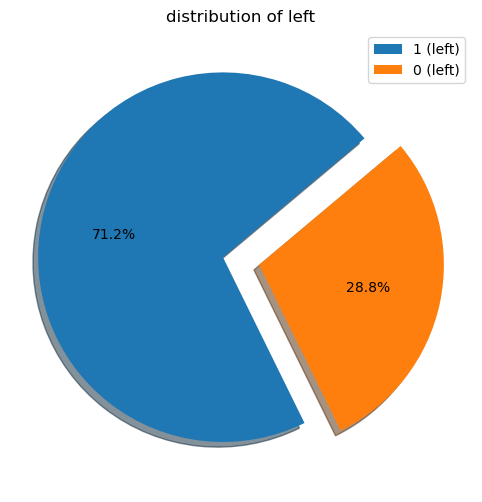

In [16]:
def plot(df,col):
    values=df[col].unique()
    plt.figure(figsize=(10,6))
    explode = [0.1 if len(values) >1 else 0] * len(values)
    plt.pie(df[col].value_counts(),explode=explode,startangle=40,autopct='%1.1f%%',shadow=True)
    labels = [f'{value} ({col})' for value in values]
    plt.legend(labels=labels,loc='upper right')
    
    plt.title(f"distribution of {col}")
    plt.show()
    
plot(df,'left')

In [17]:
col = 'left'
values = df[col].unique()


In [18]:
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x27a8fec6a50>,
 [Text(-1.1742042305664802, 0.24747610979603796, ''),
  Text(1.1742042537368607, -0.24747599985910282, '')],
 [Text(-0.6849524678304466, 0.14436106404768878, '71.2%'),
  Text(0.6849524813465019, -0.14436099991780996, '28.8%')])

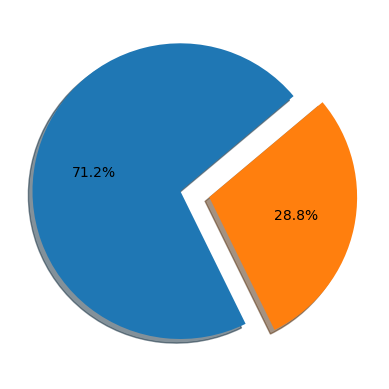

In [19]:
explode = [0.1 if len(values) >1 else 0] * len(values)
plt.pie(df[col].value_counts(),explode=explode,startangle=40,autopct='%1.1f%%',shadow=True)

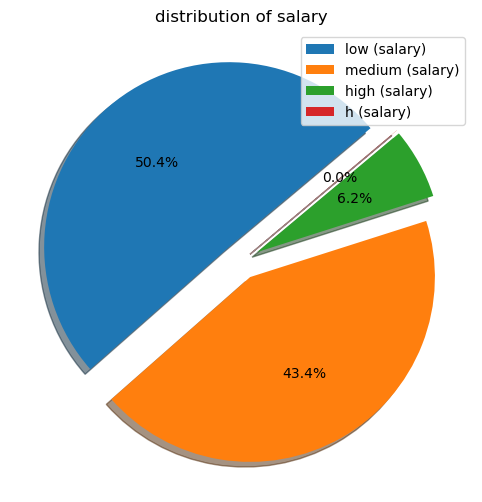

In [20]:
plot(df,'salary')

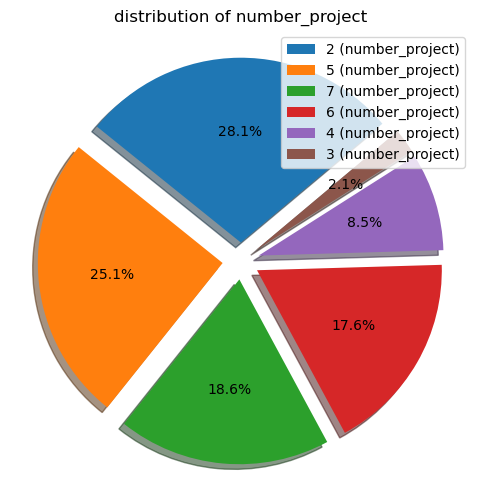

In [22]:
plot(df,'number_project')

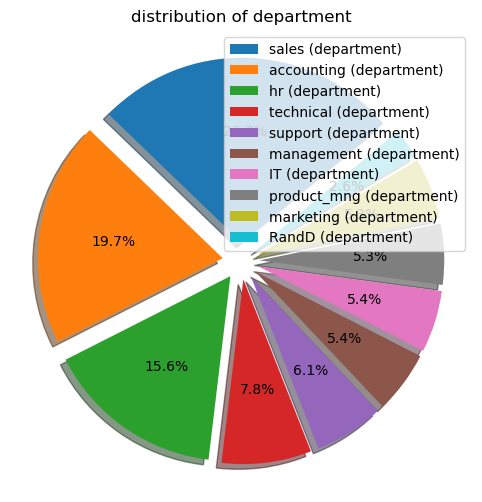

In [23]:
plot(df,'department')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

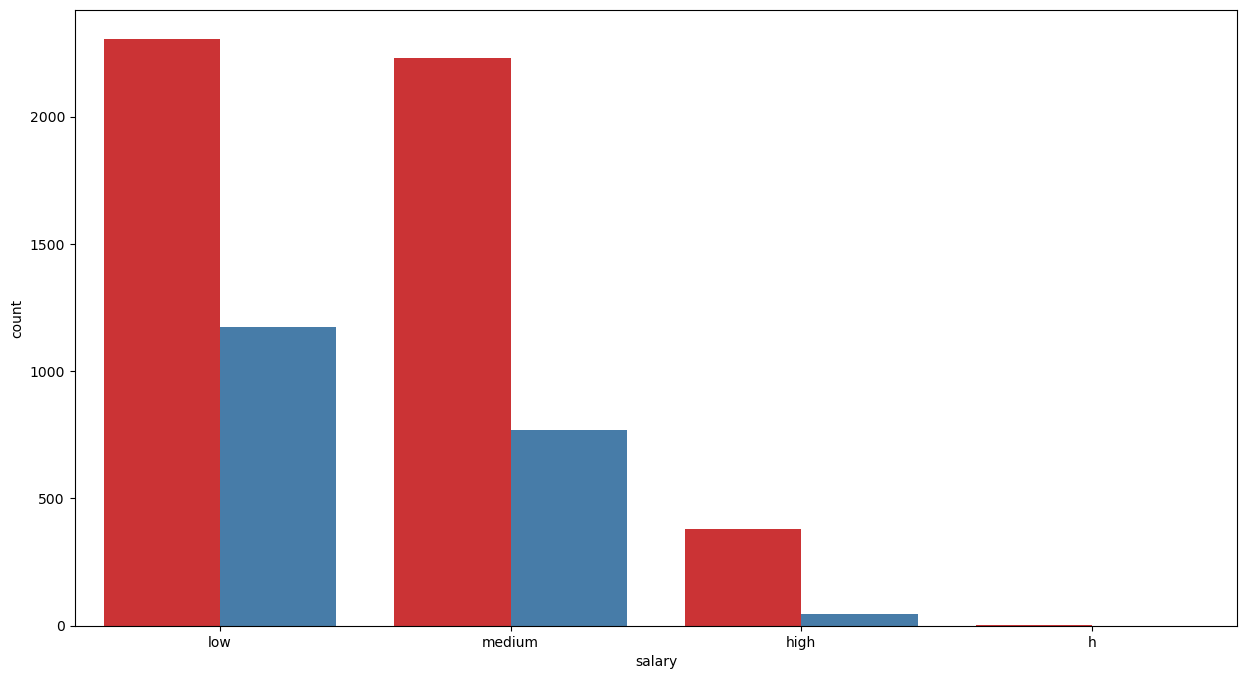

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

def distribution(df, col):
    plt.figure(figsize=(15, 8))
    
    ax = sns.countplot(x=col, hue='left', palette='Set1', data=df)

    # Update legend labels AFTER plot is drawn
    new_labels = ['Not Left', 'Left']  # or adjust according to your actual labels
    ax.legend(title='Left', labels=new_labels, loc='upper right')

    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()
distribution(df, 'salary')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

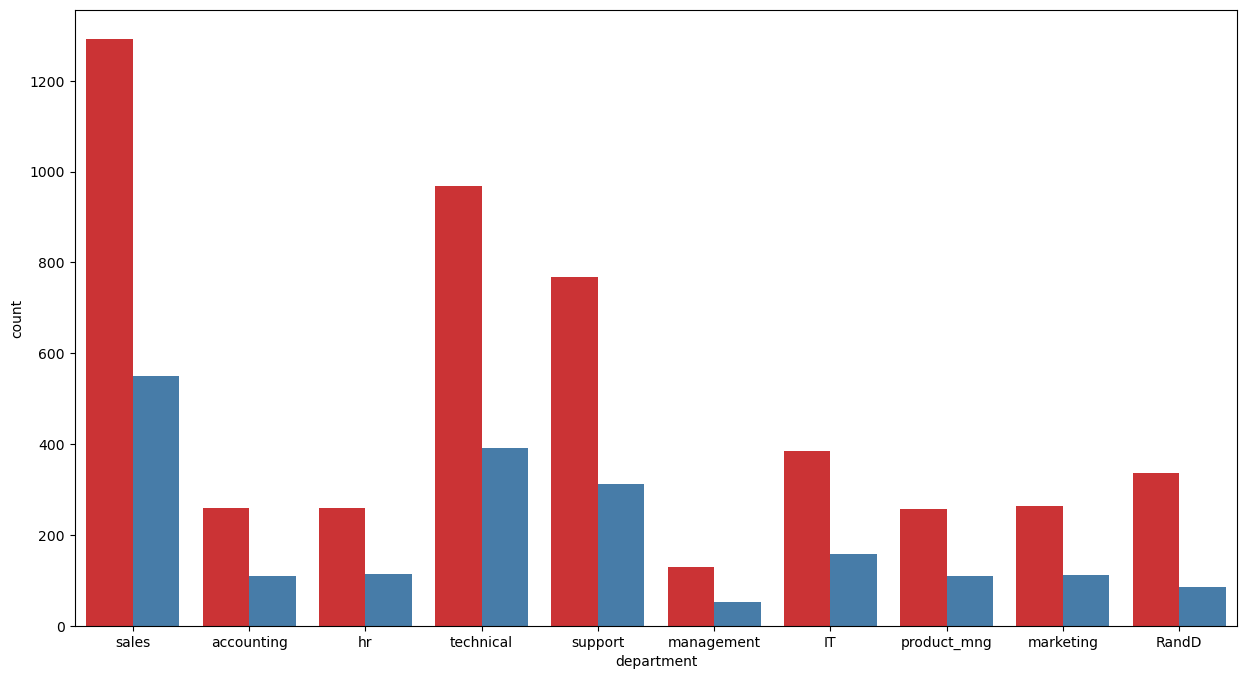

In [34]:
distribution(df, 'department')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

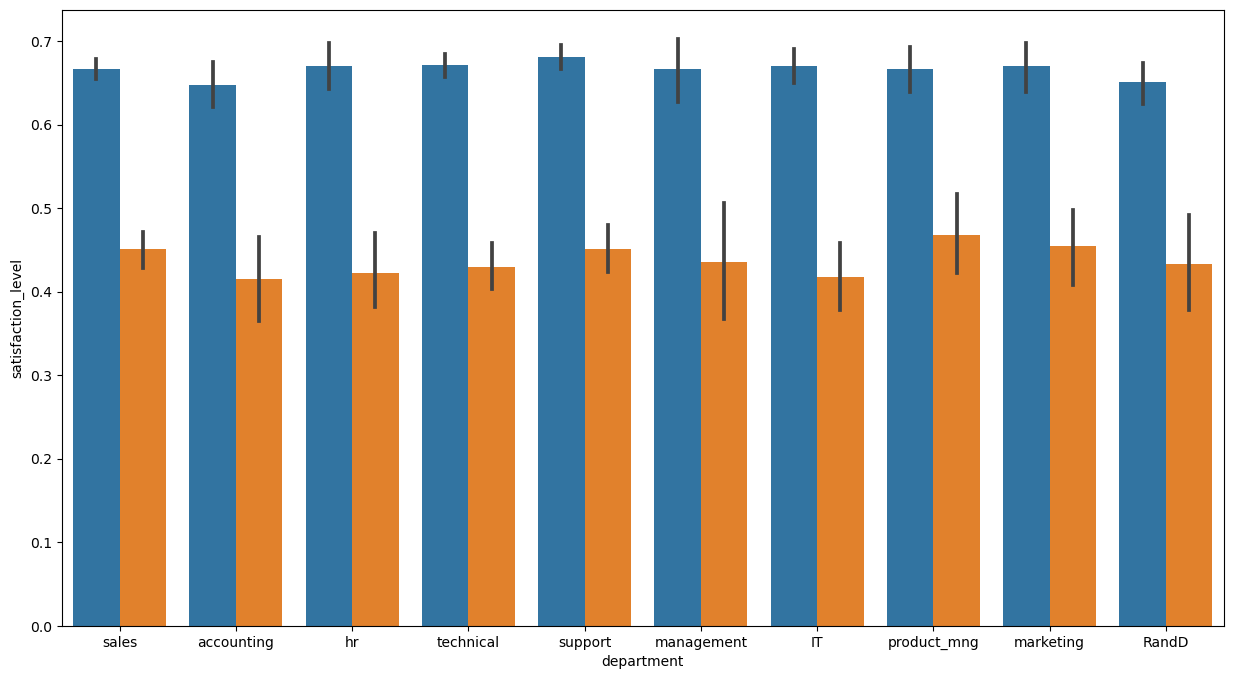

In [41]:
def comparison(df,x,y):
    plt.figure(figsize=(15,8))
    sns.barplot(x=x,y=y,hue='left',data=df)
    plt.title(f'{x} vs {y}')
    plt.show()
comparison(df,'department', 'satisfaction_level')

In [42]:
df_encoded=pd.get_dummies(df)

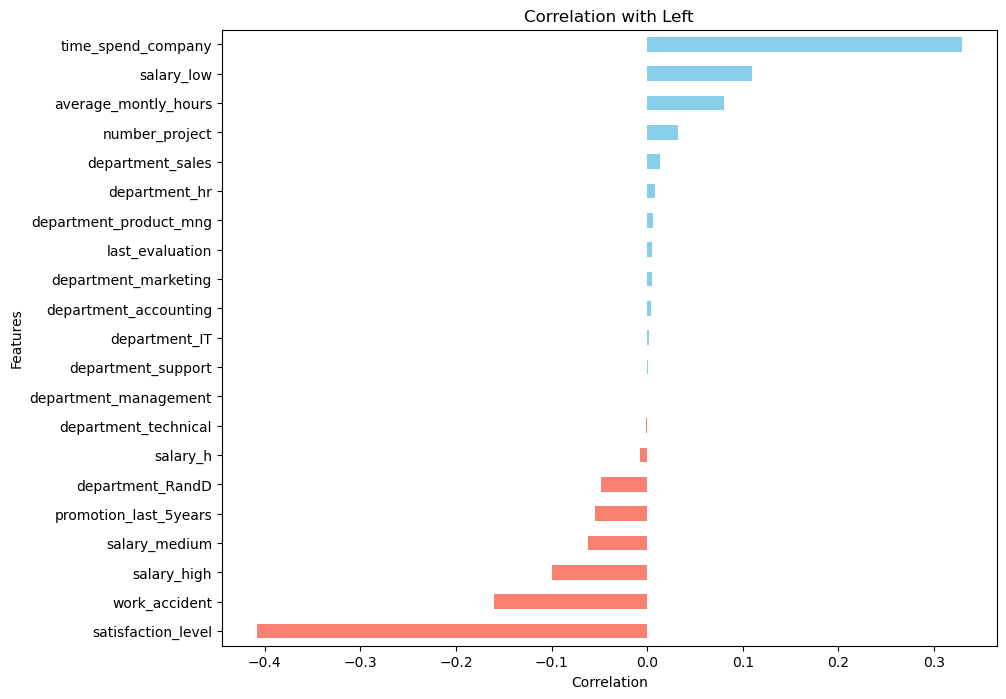

In [47]:
def corr_with_left(df):
    df_encoded = pd.get_dummies(df)
    correlations = df_encoded.corr()['left'].sort_values()[:-1]
    colors = ['skyblue' if corr>=0 else 'salmon' for corr in correlations]
    plt.figure(figsize=(10,8))
    correlations.plot(kind='barh', color=colors)
    # Add title and labels
    plt.title('Correlation with Left')
    plt.xlabel('Correlation')
    plt.ylabel('Features')

    # Show the plot
    plt.show()
corr_with_left(df)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\harsh\AppData\Local\Temp\ipykernel_18548\3831922866.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='satisfaction_level', y='last_evaluation',hue='left',shade=True,ax=axes[1])
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a f

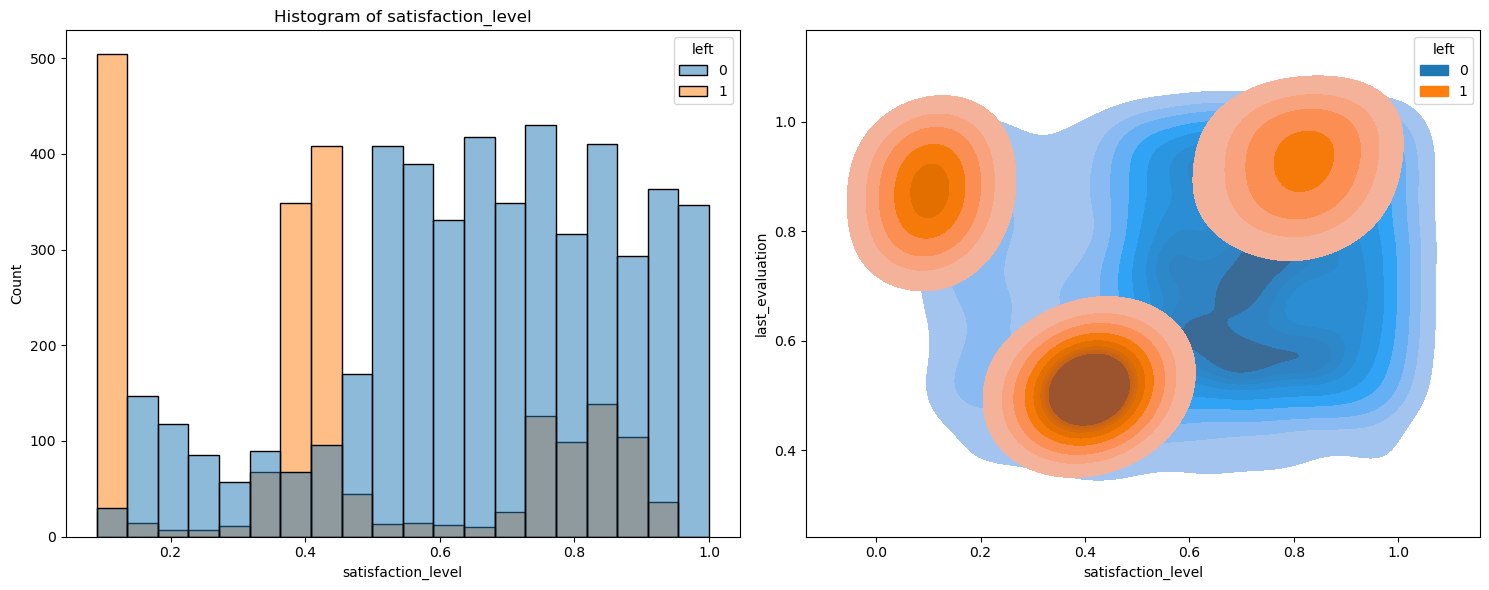

In [51]:
def hitogram(df,col):
    fig,axes=plt.subplots(1,2,figsize=(15,6))
    sns.histplot(data=df,x=col,hue='left',bins=20,ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")

    sns.kdeplot(data=df,x='satisfaction_level', y='last_evaluation',hue='left',shade=True,ax=axes[1])
    plt.tight_layout()  # Adjust the layout to prevent overlapping
    plt.show()
hitogram(df,'satisfaction_level')